## Taller 4: Probabilidad

In [1]:
import numpy as np
import sympy as sym


### 1. Calculo de probabilidad

In [2]:
cartas=np.arange(1,53)

1. 

a) 

In [3]:
def probabilidad_a(cartas,N=10000000):
    spades=np.arange(1,14)
    p_1=0
    dos_cartas=0
    for i in range(N):
        np.random.shuffle(cartas)
        if set(cartas[0:2]).issubset(set(spades)):
            dos_cartas+=1
            if set(cartas[2:5]).issubset(set(spades)):
                p_1+=1
    return p_1/dos_cartas

probabilidad_a(cartas)#Probabilidad de que las siguientes 3 cartas también sean espadas, dado que las 2 primeras cartas son espadas

0.00846377480622589

Hay una probabilidad de $0.08$ de que las siguientes 3 cartas también sean espadas, dado que las 2 primeras cartas son espadas

b)

In [4]:
def probabilidad_b(cartas, N=10000000):
    tres_cartas=0
    p_2=0
    spades=np.arange(1,14)
    for i in range(N):
        np.random.shuffle(cartas)
        if set(cartas[0:3]).issubset(set(spades)):
            tres_cartas+=1
            if set(cartas[3:5]).issubset(set(spades)):
                p_2+=1
    return p_2/tres_cartas

probabilidad_b(cartas)#Probabilidad de que las siguientes 2 cartas también sean espadas, dado que las 3 primeras cartas son espadas

0.03848862677718699

Hay una probabilidad de $0.038$ de que las siguientes 2 cartas también sean espadas, dado que las 3 primeras cartas son espadas

c) 

In [14]:
def probabilidad_c(cartas, N=10000000):
    cuatro_cartas=0
    p_3=0
    spades=np.arange(1,14)
    for i in range(N):
        np.random.shuffle(cartas)
        if set(cartas[0:4]).issubset(set(spades)):
            cuatro_cartas+=1
            if cartas[4] in spades:
                p_3+=1
    return p_3/cuatro_cartas

probabilidad_c(cartas)#Probabilidad de que la siguiente carta también sea espada, dado que las primeras 4 cartas son espadas

KeyboardInterrupt: 

Hay una probabilida de $0.18$ que la siguiente carta también sea espada, dado que las primeras 4 cartas son espadas

2.

La probabilidad de que al menos una de las dos personas se enferme es el complemento de que ninguna se enferme. Dado que, no pueden contagiarse entre sí la probabilidad de que ninguna de las dos personas se enferme es la probabilidad de que la persona inoculada no se enferme y la persona no inoculada no se enferme.

In [ ]:
n=500
poblacion_i=np.arange(1,n+1) #Población inoculada
poblacion_ni=np.arange(1,n+1) #Población no inoculada


def no_enfermos_suero(poblacion_in, N=100000): # Probabilidad que la población inoculada no se enferme
    no_enfermos=0
    n_personas_exp=int(0.6*poblacion_in.shape[0])
    poblacion_exp=poblacion_in[:n_personas_exp]
    poblacion_no_exp=poblacion_in[n_personas_exp:]
    n_personas_c=int(0.20*poblacion_in.shape[0])
    perso_pueden_enferm=np.random.choice(poblacion_exp, size=n_personas_c)
    for i in range(N):
        enfermo=np.random.choice(poblacion_in)
        if enfermo not in perso_pueden_enferm or enfermo in poblacion_no_exp:
            no_enfermos+=1
    return no_enfermos/N

def no_enfermos_no_suero(poblacion_no_in, N=100000): # Probabilidad que la población no inoculada no se enferme
    no_enfermos=0
    n_personas_exp=int(0.6*poblacion_no_in.shape[0])
    poblacion_exp=poblacion_no_in[:n_personas_exp]
    poblacion_no_exp=poblacion_no_in[n_personas_exp:]
    n_personas_c=int(0.10*poblacion_no_in.shape[0])
    perso_no_enferm=np.random.choice(poblacion_exp, size=n_personas_c)
    for i in range(N):
        enfermo=np.random.choice(poblacion_no_in)
        if enfermo in perso_no_enferm or enfermo in poblacion_no_exp:
            no_enfermos+=1
    return no_enfermos/N


p_no_enferm=no_enfermos_suero(poblacion_i)*no_enfermos_no_suero(poblacion_ni) #Probabilidad que ningúno de los dos se enferme
p_T=1-p_no_enferm
p_T  #Probabilidad que al menos uno de los dos se enferme

0.586994095

Hay una probabilidad del $0.59$ de que al menos una de las dos personas, una inoculada y otra no, enferme.

### 2. Distribuciones de probabilidad discretas

1.

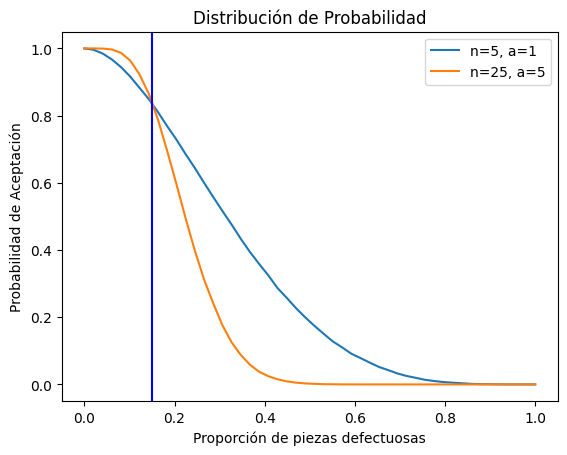

In [45]:
import matplotlib.pyplot as plt

def lotes(n,a): 
    S = 99999
    P = np.linspace(0,1)
    Img = []
    for i in P:
        pAcep = 0
        bi = np.random.binomial(n,i,S)
        for j in bi:
            if j<=a:
                pAcep+=1
        pAcep = pAcep/np.size(bi)
        Img.append(pAcep)
    return P,Img

P, Img  = lotes(5,1)
P2,Img2 = lotes(25,5)
plt.title("Distribución de Probabilidad")
plt.ylabel("Probabilidad de Aceptación")
plt.xlabel("Proporción de piezas defectuosas")
plt.plot(P,Img,label = 'n=5, a=1')
plt.plot(P2,Img2,label = 'n=25, a=5')
plt.axvline(x = 0.15, color = 'b')
plt.legend()

Antes de la vertical puesta en x = 0.15, se puede observar que el segundo plan de muestreo tiene una probabilidad de aceptación mayor. Sin embargo, después de la vertical, este plan de muestreo baja su probabliidad de aceptación exponencialmente, siendo más conveniente el primero.

a) Debido a lo explicado anteriormente, el segundo plan de muestreo, donde n = 25 y a = 5, es más conveniente para una probabilidad de hasta el 10%

b) De la misma manera, el primer plan de muestreo, donde n = 5 y a = 1, resulta más conveniente para una probabildad que supere el 30%   

2.

a)

In [72]:
def desconexion1(lam):
    N = np.linspace(1,100,100)
    S = 100000
    for i in N:
        prob = 0
        P = np.random.poisson(lam,S)
        for j in P:
             if j>=i:
                 prob+=1
        prob = prob/S
        if prob<0.01:
            return i

###Tasa de desconexión 1 cada 4 horas, por lo que lambda = 1
print("El menor valor de n para al menos n desconexiones con una probabilidad menor a 0.01 fue n = ", desconexion1(1))

El menor valor de n para al menos n desconexiones con una probabilidad menor a 0.01 fue n =  5.0


b)


In [75]:
def desconexion2():
    '''
    Tasa de desconexión: 1 cada 4 horas
    Lambda = h*1/4
    '''
    N = np.linspace(1,100,100)
    S = 100000
    for i in N:
        prob = 0 
        P = np.random.poisson(i*0.25,S)
        for j in P:
            if j ==0:
                prob +=1 
        prob = prob/S
        if prob < 0.02:
            return i

print("El menor valor de horas h con probabilidad menor a 0.02 de tener 0 desconexiones fue con  h =", desconexion2())

El menor valor de horas h con probabilidad menor a 0.02 de tener 0 desconexiones fue con  h = 16.0


c)

In [83]:
def desconexion3():
    prob = 0 
    S =10000
    for i in range(S):
        a1 = np.random.poisson(1,1) == 0
        a2 = np.random.poisson(1,1) == 0
        a3 = np.random.poisson(1,1) == 0 
        if a1^a2^a3:
            prob+=1
    return prob/S

print("La probabilidad de que exclusivamente uno de los 3 periodos tenga 0 desconexiones es: ", desconexion3())

La probabilidad de que exclusivamente uno de los 3 periodos tenga 0 desconexiones es:  0.49046


d)

In [91]:
def desconexion4():
    ### Si hay una desconexión cada 4 horas, en 3 periodos consecutivos se esperarían 3 desconexiones
    prob = 0
    S = 10000
    for i in range(S):
        a1 = np.random.poisson(1,1)
        a2 = np.random.poisson(1,1)
        a3 = np.random.poisson(1,1)
        if a1+a2+a3 == 3:
            prob+=1
    return prob/S

print("La probabilidad de tener 3 desconexiones en 3 periodos consecutivos de 4 horas es de: ", desconexion4())

La probabilidad de tener 3 desconexiones en 3 periodos consecutivos de 4 horas es de:  0.2283


### 3. Distribuciones de probabilidad continuas

1. 

In [ ]:
x=sym.Symbol('x', real=True)
f = sym.Piecewise((x**2/3, (x >= -1) & (x <= 2)), (0, True))
f

Piecewise((x**2/3, (x >= -1) & (x <= 2)), (0, True))

a)

In [ ]:
sym.integrate(f,(x,0,1)) #P(0 < X ≤ 1)

1/9

b)

In [ ]:
sym.integrate(f,(x,1,2)) #P(1 < X ≤ 2)

7/9

2.

In [ ]:
N=10000
calificaciones=np.random.normal(78,6,N)

a) 

In [ ]:
def probabilidad_mayor_a(calificaciones, a):
    cumple=0
    for i in range(N):
        if calificaciones[i]>=a:
            cumple+=1

    return cumple/N

proporcion=probabilidad_mayor_a(calificaciones,72)
proporcion  #Probabilidad de calificaciones mayores a 72

0.8463

Hay una probabilidad de $0.84$ que una persona que haga el examen alcance calificaciones mayores a 72 

b) 

In [ ]:
def diez_mas_alto(calificaciones):
    probabilidad=0.5
    calificaciones=np.sort(calificaciones)
    i=int(calificaciones.shape[0]/2)
    while probabilidad>=0.10:
        probabilidad=probabilidad_mayor_a(calificaciones,calificaciones[i])
        minima_nota=calificaciones[i]
        i+=1
    return minima_nota

diez_mas_alto(calificaciones)# calificación mínima para recibir un A

85.54488150933989

La calificación mínima para obtener un A es $85$ 

c) 

In [ ]:
def veintiocho_mas_alto(calificaciones):
    probabilidad=0.5
    calificaciones=np.sort(calificaciones)
    i=int(calificaciones.shape[0]/2)
    while probabilidad>=0.281:
        probabilidad=probabilidad_mayor_a(calificaciones,calificaciones[i])
        limite=calificaciones[i]
        i+=1
    return limite

veintiocho_mas_alto(calificaciones) #Punto límite para pasar el examen

81.48639102405949

El punto límite para pasar el examen, si el examinador desea pasar a solo $28.1$% es $81.5$

d) 

In [ ]:
def corte_mayor_25(calificaciones):
    probabilidad=0.5
    calificaciones=np.sort(calificaciones)
    i=int(calificaciones.shape[0]/2)
    limite=0
    while probabilidad<=0.75:
        probabilidad=probabilidad_mayor_a(calificaciones,calificaciones[i])
        limite=calificaciones[i]
        i-=1
    return limite

def porcentaje_mas_bajo(calificaciones):
    corte_25_mas_bajo=corte_mayor_25(calificaciones)
    proporcion=0
    limite=corte_25_mas_bajo+5
    for i in range(N):
        if calificaciones[i]>=limite:
            proporcion+=1
    return proporcion/N

porcentaje_mas_bajo(calificaciones)#Porporción de estudiantes con calificaciones 5 puntos más arriba 

0.4375

Una proporción de $0.44$ estudiantes tienen calificaciones de 5 o más puntos arriba de la calificación que corta al $25$ % más bajo

e) 

In [ ]:
def probabilidad_mayor_84(califcaciones):
    count=0
    s=0
    for i in califcaciones:
        if i>=72:
            s+=1
            if i>=84:
                count+=1
    return count/s

probabilidad_mayor_84(calificaciones) 

0.18397731300957107

La probabilidad de que la calificación de un estudiante exceda de 84 dado que excede de 72 es de $18$%